In [1]:
#Importando livrarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Importando os conjuntos de dados

In [2]:
def importData():
    data_set = pd.read_csv('dataset/train.csv')
    submission_set = pd.read_csv('dataset/test.csv')
    return (data_set, submission_set)

data_set, submission_set= importData()

print("The train set have %i lines and %i columns" % data_set.shape)
print("The test set have %i lines and %i columns" % submission_set.shape)

The train set have 1460 lines and 81 columns
The test set have 1459 lines and 80 columns


# Análise Exploratória

In [3]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_features = data_set.select_dtypes(include=numerics)
list(num_features)

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [4]:
categorical = ['object']
cat_features = data_set.select_dtypes(include=categorical)
list(cat_features)

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [5]:
#Checando as colunas
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
#Checando histogramas
#data_set.hist(bins=50, figsize=(40,40))
#plt.show()

In [7]:
#Verificando algumas caracteristicas do nosso target
data_set['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

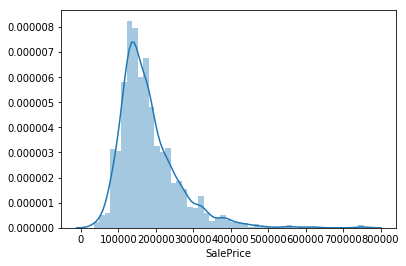

In [8]:
#Verificando a distribuição normal do nosso target (SalePrice)
sns.distplot(data_set['SalePrice']);

Verificando a obliquidade (Skewness)
- Se Skewness>0, então a distribuição tem uma cauda direita (valores acima da média) mais pesada
- Se Skewness<0, então a distribuição tem uma cauda esquerda (valores abaixo da média) mais pesada
- Se Skewness=0, então a distribuição é aproximadamente simétrica (na terceira potência do desvio em relação à média).

Verificado a curtose (Kurtosis) ou achatamento da distribuição normal
- Se o valor da curtose for = 0, então tem o mesmo achatamento que a distribuição normal. Chama-se a estas funções de mesocúrticas.
- Se o valor é > 0, então a distribuição em questão é mais alta (afunilada) e concentrada que a distribuição normal. Diz-se que esta função probabilidade é leptocúrtica, ou que a distribuição tem caudas pesadas (o significado é que é relativamente fácil obter valores que não se aproximam da média a vários múltiplos do desvio padrão)
- Se o valor é < 0, então a função de distribuição é mais "achatada" que a distribuição normal. Chama-se-lhe platicúrtica

In [9]:
print("Skewness: %f" % data_set['SalePrice'].skew())
print("Kurtosis: %f" % data_set['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Então neste caso temos uma função probabilidade de calda longa e leptocúrtica

Como os modelos de regressão lineares tendem a funcionar melhor com uma maior normalidade iremos lider com uma transformação do SalePrice

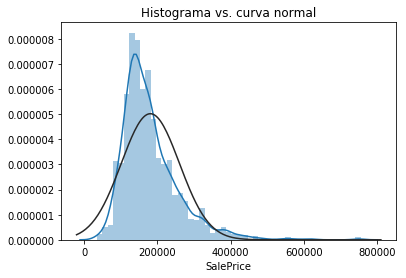

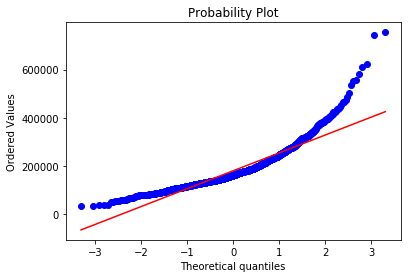

In [10]:
#Histograma vs. curva normal
sns.distplot(data_set['SalePrice'], fit=norm).set_title('Histograma vs. curva normal');
fig = plt.figure()
#Probabilidade normal
res = stats.probplot(data_set['SalePrice'], plot=plt)

In [11]:
#Transformação log no SalePrice
data_set['SalePrice'] = np.log(data_set['SalePrice'])

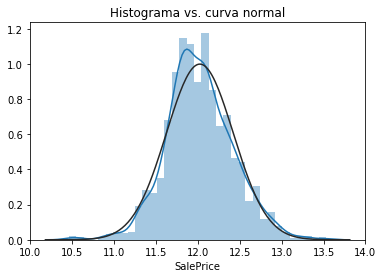

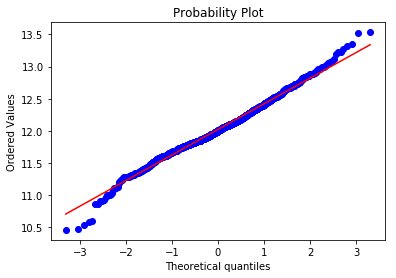

In [12]:
#Histograma vs. curva normal
sns.distplot(data_set['SalePrice'], fit=norm).set_title('Histograma vs. curva normal');
fig = plt.figure()
#Probabilidade normal
res = stats.probplot(data_set['SalePrice'], plot=plt)

In [13]:
print("Skewness: %f" % data_set['SalePrice'].skew())
print("Kurtosis: %f" % data_set['SalePrice'].kurt())

Skewness: 0.121335
Kurtosis: 0.809532


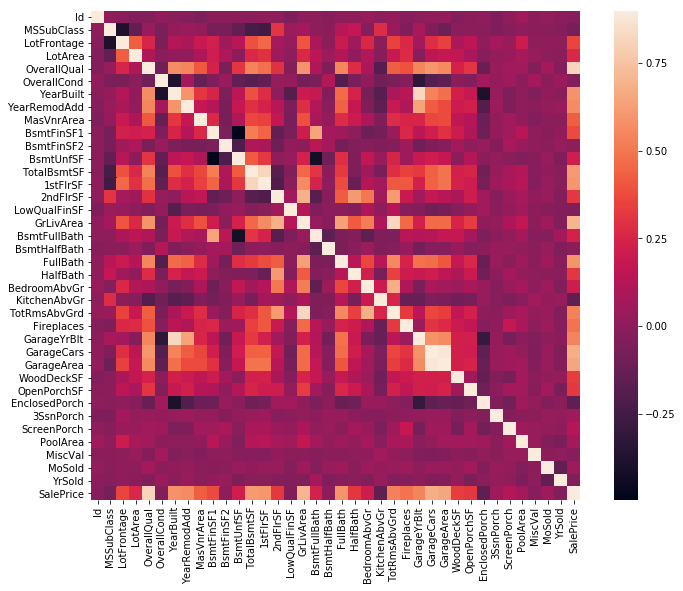

In [14]:
#Checking the correlation matrix
matrizcorrelacao = data_set.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(matrizcorrelacao, vmax=0.9, square=True);

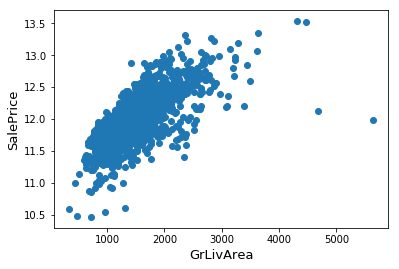

In [15]:
#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(data_set['GrLivArea'], data_set['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [16]:
#Deletando outliers
data_set = data_set.drop(data_set[(data_set['GrLivArea']>4000) & (data_set['SalePrice']>11.5)].index)
data_set = data_set.drop(data_set[(data_set['SalePrice']<10.7)].index)

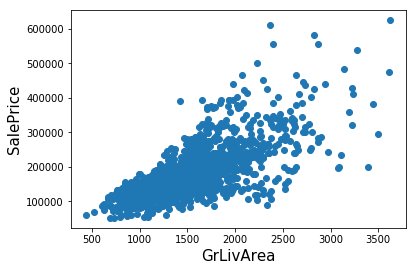

In [17]:
#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(data_set['GrLivArea'], np.exp(data_set['SalePrice']))
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

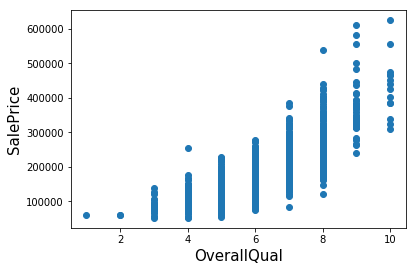

In [18]:
#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(data_set['OverallQual'], np.exp(data_set['SalePrice']))
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('OverallQual', fontsize=15)
plt.show()

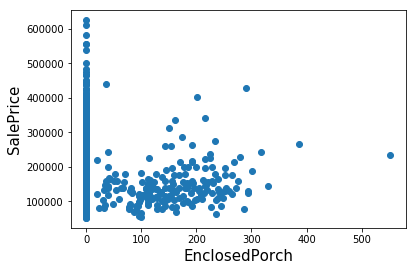

In [19]:
#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(data_set['EnclosedPorch'], np.exp(data_set['SalePrice']))
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('EnclosedPorch', fontsize=15)
plt.show()

In [20]:
# Simple Linear Regression
# Importing the dataset
X = (data_set['GrLivArea'].values).reshape(-1,1)
y = np.exp(data_set['SalePrice']).reshape(-1,1)

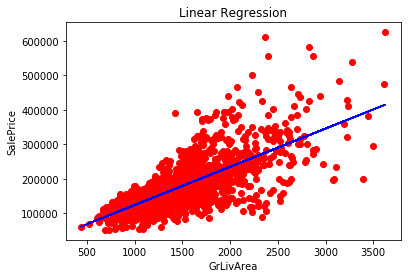

In [21]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)
# Visualising the Training set results
plt.scatter(X[:,0], y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

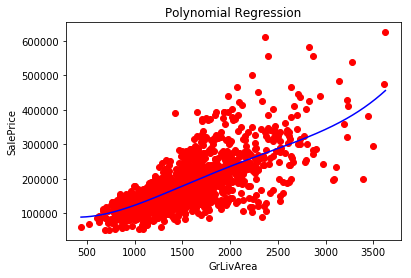

In [22]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

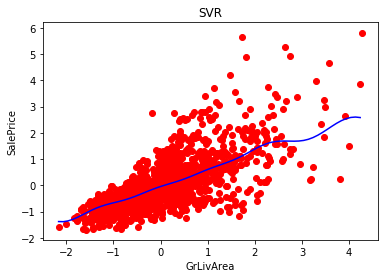

In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y)

# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_scaled, y_scaled)

# Predicting a new result
y_pred = regressor.predict(6.5)
y_pred = sc_y.inverse_transform(y_pred)

# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X_scaled), max(X_scaled), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_scaled, y_scaled, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('SVR')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

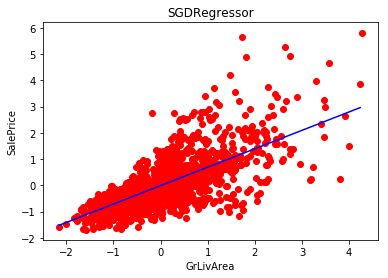

In [24]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y)

# Fitting SVR to the dataset
from sklearn.linear_model import SGDRegressor
regressor = SGDRegressor()
regressor.fit(X_scaled, y_scaled)

# Predicting a new result
y_pred = regressor.predict(6.5)
y_pred = sc_y.inverse_transform(y_pred)

# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X_scaled), max(X_scaled), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_scaled, y_scaled, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('SGDRegressor')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

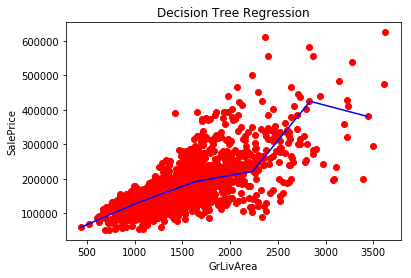

In [25]:
# Fitting Simple Linear Regression to the Training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X, y)

# Visualising the Decision Tree Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 600)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Decision Tree Regression')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

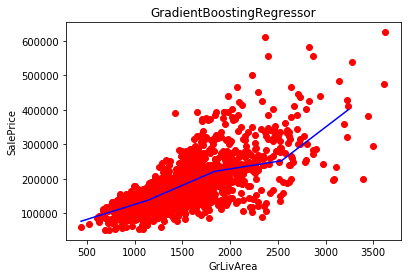

In [26]:
# Fitting Simple Linear Regression to the Training set
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(X, y)

# Visualising the Decision Tree Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 700)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('GradientBoostingRegressor')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

# Pré-processamento

In [27]:
#Adding an empty sales price column in the test data
submission_set["SalePrice"] = ""
submission_set["SalePrice"] = np.nan
print("The train set have %i lines and %i columns" % data_set.shape)
print("The test set have %i lines and %i columns" % submission_set.shape)

#Concating the train and test data
total_data = pd.concat([data_set, submission_set])
total_data=total_data.reset_index()
print("The total set have %i lines and %i columns" % total_data.shape)

#Saving the data into a csv file
total_data.to_csv("total_data.csv", sep=',')

The train set have 1451 lines and 81 columns
The test set have 1459 lines and 81 columns
The total set have 2910 lines and 82 columns


Observamos que as variaveis index e Id não são features, e sim apenas identificadores por isso vamos removelas do conjunto de dados

In [28]:
total_data.head(2)

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011


In [29]:
#Removendo coluna de Id e Index, esta coluna atrapalharia em nosso modelo futuro
total_data = total_data.drop("Id", axis=1)
total_data = total_data.drop("index", axis=1)

### Análise de dados fatantes

In [30]:
#missing data
set_analysed = total_data
total = set_analysed.isnull().sum().sort_values(ascending=False)
percent = (set_analysed.isnull().sum()/set_analysed.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(40))

              Total   Percent
PoolQC         2902  0.997251
MiscFeature    2805  0.963918
Alley          2713  0.932302
Fence          2343  0.805155
SalePrice      1459  0.501375
FireplaceQu    1415  0.486254
LotFrontage     486  0.167010
GarageCond      156  0.053608
GarageYrBlt     156  0.053608
GarageQual      156  0.053608
GarageFinish    156  0.053608
GarageType      154  0.052921
BsmtCond         81  0.027835
BsmtExposure     81  0.027835
BsmtQual         80  0.027491
BsmtFinType2     79  0.027148
BsmtFinType1     78  0.026804
MasVnrType       24  0.008247
MasVnrArea       23  0.007904
MSZoning          4  0.001375
Utilities         2  0.000687
Functional        2  0.000687
BsmtFullBath      2  0.000687
BsmtHalfBath      2  0.000687
GarageCars        1  0.000344
BsmtFinSF2        1  0.000344
Exterior2nd       1  0.000344
GarageArea        1  0.000344
TotalBsmtSF       1  0.000344
BsmtUnfSF         1  0.000344
BsmtFinSF1        1  0.000344
Exterior1st       1  0.000344
KitchenQua

In [31]:
#"PoolQC"
print(data_set["PoolQC"].value_counts())
total_data["PoolQC"].fillna("NA", inplace=True)

Gd    2
Fa    2
Ex    1
Name: PoolQC, dtype: int64


In [32]:
#"MiscFeature"
print(total_data["MiscFeature"].value_counts())
#Por hora vamos dropar essa feature, mas uma ideia seria criar outras variaveis para Shed, Gar2, e TenC
total_data = total_data.drop(["MiscFeature"], axis=1)

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64


In [33]:
#"Alley"
print(total_data["Alley"].value_counts())
total_data["Alley"].fillna("NA", inplace=True)

Grvl    120
Pave     77
Name: Alley, dtype: int64


In [34]:
#"Fence"
print(total_data["Fence"].value_counts())
total_data["Fence"].fillna("NA", inplace=True)

MnPrv    327
GdPrv    118
GdWo     110
MnWw      12
Name: Fence, dtype: int64


In [35]:
#"FireplaceQu"
print(total_data["FireplaceQu"].value_counts())
total_data["FireplaceQu"].fillna("NA", inplace=True)

Gd    742
TA    591
Fa     74
Po     46
Ex     42
Name: FireplaceQu, dtype: int64


In [36]:
#"LotFrontage"
from LotFrontage import predictLotFrontage
total_data["LotFrontage"]=predictLotFrontage()

In [37]:
#"GarageCond"
#"GarageFinish"
#"GarageQual"
#"GarageType"
total_data["GarageCond"].fillna("NA", inplace=True)
total_data["GarageFinish"].fillna("NA", inplace=True)
total_data["GarageQual"].fillna("NA", inplace=True)
total_data["GarageType"].fillna("NA", inplace=True)

In [38]:
#"GarageYrBlt"
total_data = total_data.drop("GarageYrBlt", axis=1) 

In [39]:
todrop=total_data[["GarageFinish","GarageQual","GarageType","GarageCond"]].loc[total_data['GarageCars'].isnull()].index[0]

In [40]:
total_data.at[todrop,'GarageCars']=0
print(total_data["GarageCars"].value_counts())

2.0    1593
1.0     774
3.0     371
0.0     155
4.0      16
5.0       1
Name: GarageCars, dtype: int64


In [41]:
#"BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1"
total_data["BsmtExposure"].fillna("NA", inplace=True)
total_data["BsmtCond"].fillna("NA", inplace=True)
total_data["BsmtQual"].fillna("NA", inplace=True)
total_data["BsmtFinType2"].fillna("NA", inplace=True)
total_data["BsmtFinType1"].fillna("NA", inplace=True)

In [42]:
#"MasVnrType", "MasVnrArea"
total_data["MasVnrType"].fillna("NA", inplace=True)
total_data["MasVnrArea"].fillna(0, inplace=True)

In [43]:
#total_data.loc[total_data["MSZoning"].isnull()].T
print(total_data["MSZoning"].value_counts())
# ESTRATÉGIA ADOTADA, PREENCHER COM O MAIS COMUM
total_data["MSZoning"].fillna("RL", inplace=True)
#data['LotFrontage'].loc[data['LotFrontage'].isnull()].index

RL         2260
RM          459
FV          139
RH           26
C (all)      22
Name: MSZoning, dtype: int64


In [44]:
print(total_data["BsmtFullBath"].value_counts())
# ESTRATÉGIA ADOTADA, PREENCHER COM O MAIS COMUM
total_data["BsmtFullBath"].fillna(0, inplace=True)

0.0    1700
1.0    1169
2.0      37
3.0       2
Name: BsmtFullBath, dtype: int64


In [45]:
print(total_data["BsmtHalfBath"].value_counts())
# ESTRATÉGIA ADOTADA, PREENCHER COM O MAIS COMUM
total_data["BsmtHalfBath"].fillna(0, inplace=True)

0.0    2734
1.0     170
2.0       4
Name: BsmtHalfBath, dtype: int64


In [46]:
print(total_data["Utilities"].value_counts())
#Variavel explica pouca variança no dataset, por isso a decisão de dropar esta feature
total_data = total_data.drop("Utilities", axis=1)

AllPub    2907
NoSeWa       1
Name: Utilities, dtype: int64


In [47]:
print(total_data["Functional"].value_counts())
# ESTRATÉGIA ADOTADA, PREENCHER COM O MAIS COMUM
total_data["Functional"].fillna("Typ", inplace=True)

Typ     2708
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64


In [48]:
total_data["GarageArea"].describe()
print(total_data[["GarageCars", "GarageArea"]].loc[total_data["GarageArea"].isnull()].T)
total_data["GarageArea"].fillna(0, inplace=True)

            2567
GarageCars   0.0
GarageArea   NaN


In [49]:
#print(total_data["BsmtFinSF2"].value_counts())
print(total_data[["BsmtQual", "BsmtFinSF2"]].loc[total_data["BsmtFinSF2"].isnull()].T)
total_data["BsmtFinSF2"].fillna(0, inplace=True)

           2111
BsmtQual     NA
BsmtFinSF2  NaN


In [50]:
#BsmtUnfSF
#print(total_data["BsmtUnfSF"].value_counts())
print(total_data[["BsmtQual", "BsmtUnfSF"]].loc[total_data["BsmtUnfSF"].isnull()].T)
total_data["BsmtUnfSF"].fillna(0, inplace=True)

          2111
BsmtQual    NA
BsmtUnfSF  NaN


In [51]:
print(total_data[["BsmtQual", "TotalBsmtSF"]].loc[total_data["TotalBsmtSF"].isnull()].T)
total_data["TotalBsmtSF"].fillna(0, inplace=True)

            2111
BsmtQual      NA
TotalBsmtSF  NaN


In [52]:
print(total_data[["BsmtQual", "BsmtFinSF1"]].loc[total_data["BsmtFinSF1"].isnull()].T)
total_data["BsmtFinSF1"].fillna(0, inplace=True)

           2111
BsmtQual     NA
BsmtFinSF1  NaN


In [53]:
print(total_data["Electrical"].value_counts())
total_data["Electrical"].fillna("SBrkr", inplace=True)

SBrkr    2665
FuseA     186
FuseF      49
FuseP       8
Mix         1
Name: Electrical, dtype: int64


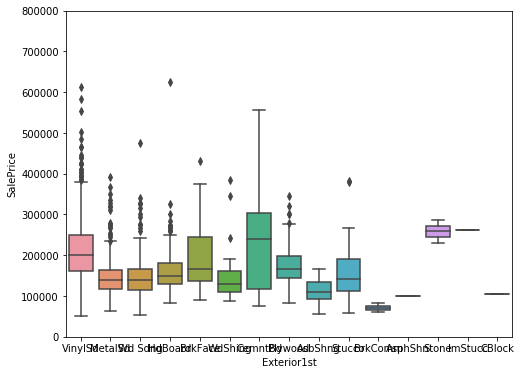

In [54]:
#box plot Exterior1st/saleprice
var = 'Exterior1st'
Exterior2ndPLOT = pd.concat([(np.exp(data_set['SalePrice'])), data_set[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=Exterior2ndPLOT)
fig.axis(ymin=0, ymax=800000);

In [55]:
print(total_data['Exterior1st'].value_counts())
#ESTRATÉGIA ADOTADA, PREENCHER COM O MAIS COMUM
total_data['Exterior1st'].fillna("VinylSd", inplace=True)

VinylSd    1023
MetalSd     450
HdBoard     441
Wd Sdng     409
Plywood     221
CemntBd     125
BrkFace      86
WdShing      56
AsbShng      43
Stucco       42
BrkComm       6
CBlock        2
AsphShn       2
Stone         2
ImStucc       1
Name: Exterior1st, dtype: int64


In [56]:
print(total_data['Exterior2nd'].value_counts())
#ESTRATÉGIA ADOTADA, PREENCHER COM O MAIS COMUM
total_data['Exterior2nd'].fillna("VinylSd", inplace=True)

VinylSd    1012
MetalSd     447
HdBoard     405
Wd Sdng     390
Plywood     270
CmentBd     125
Wd Shng      81
Stucco       46
BrkFace      46
AsbShng      37
Brk Cmn      22
ImStucc      14
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64


In [57]:
print(total_data["KitchenQual"].value_counts())
total_data["KitchenQual"].fillna("TA", inplace=True)

TA    1488
Gd    1151
Ex     201
Fa      69
Name: KitchenQual, dtype: int64


In [58]:
print(total_data["SaleType"].value_counts())
total_data["SaleType"].fillna("WD", inplace=True)

WD       2518
New       237
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64


#### Verificando se conseguimos eliminar todos os dados faltantes

In [59]:
#missing data
set_analysed = total_data
total = set_analysed.isnull().sum().sort_values(ascending=False)
percent = (set_analysed.isnull().sum()/set_analysed.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(2))

            Total   Percent
SalePrice    1459  0.501375
Foundation      0  0.000000


#### Ajustando alguns dados numéricos para categoricos

In [60]:
total_data['MSSubClass'].value_counts()

20     1077
60      571
50      286
120     182
30      138
160     128
70      127
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [61]:
#Year and month sold are transformed into categorical features.
# Descrição: YrSold: Year Sold (YYYY)
total_data['YrSold']=total_data['YrSold'].astype(str)
# Descrição: MoSold: Month Sold (MM)
total_data['MoSold']=total_data['MoSold'].astype(str)
# Descrição: Identifies the type of dwelling involved in the sale.
total_data['MSSubClass']=total_data['MSSubClass'].astype(str)

#### Transdormando categorial features em dummie variables

In [62]:
total_data=pd.get_dummies(total_data)

#### Vamos salvar nossos dados pré-processados caso quisermos reutilizalos em outro momento

In [63]:
preprocessed_total_data = total_data
#print(preprocessed_total_data)
#Salvando dados em formato CSV
preprocessed_total_data.to_csv("preprocessed_data.csv", sep=',')

In [64]:
#Separando o data_set e o submission_set
preprocessed_data_set = preprocessed_total_data.iloc[:1451, :]
preprocessed_submission_set = preprocessed_total_data.iloc[1451:,:]
print(preprocessed_data_set.shape)
print(preprocessed_submission_set.shape)

(1451, 325)
(1459, 325)


#### Dividindo as features e target em train e test set

In [65]:
y = preprocessed_data_set['SalePrice']
X = preprocessed_data_set.drop(labels='SalePrice', axis=1)

# Modelos

## Definindo medidas de performance

In [66]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score
def RMSE_score(model, X, y, k_num):
    kfold = KFold(k_num, shuffle=True, random_state=42).get_n_splits(X.values)
    RMSE = np.sqrt(-cross_val_score(model, X.values, y, scoring="neg_mean_squared_error", cv = kfold))
    return(RMSE)

def R2_score(model, X, y, k_num):
    kfold = KFold(k_num, shuffle=True, random_state=42).get_n_splits(X.values)
    R2 = (cross_val_score(model, X.values, y, scoring="r2", cv = kfold))
    return(R2)

## Treinando os modelos

In [67]:
#impotando modelos descritos nas propostas
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler

### LinearRegression

In [68]:
#Definindo o modelo e aplicando GridScearchCV
regressorLinearRegression = LinearRegression()

parameters = [{'fit_intercept': [True, False],
              'normalize': [False, True]}]

grid_search = GridSearchCV(estimator = regressorLinearRegression,
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = 2,
                           n_jobs = -1)

grid_search = grid_search.fit(X, y)
best_estimator_LinearRegression = grid_search.best_estimator_
print(best_estimator_LinearRegression)

regressorLinearRegression = best_estimator_LinearRegression
model = regressorLinearRegression
RMSE = RMSE_score(regressorLinearRegression, X, y, 2)
R2 = R2_score(regressorLinearRegression, X, y, 2)
print("LinearRegression RMSE score: {:.4f} ({:.4f}), R2 score {:.4f} ({:.4f})\n".format(RMSE.mean(), RMSE.std(), R2.mean(), R2.std()))

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)
LinearRegression RMSE score: 0.1353 (0.0087), R2 score 0.8775 (0.0053)



### PolinomialRegression (LinearRegression with PolynomialFeatures)

In [69]:
# Feature Scaling
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Para que possamos trabalhar com PolynomialFeatures será necessário reduzir o tamanho no nosso dataset,
# para isso uma possivel solução é aplicar PCA

from sklearn.decomposition import PCA
pca = PCA(n_components = 8)
X_PCA = pca.fit_transform(X_scaled)

#Aplicando PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2, interaction_only=False)
X_poly = poly_reg.fit_transform(X_PCA)

#Definindo o modelo e aplicando GridScearchCV
regressor = LinearRegression()

parameters = [{'fit_intercept': [True, False],
              'normalize': [False, True]}]

grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = 2,
                           n_jobs = -1)

grid_search = grid_search.fit(X_poly, y)
best_estimator_PolinomialRegression = grid_search.best_estimator_
print(best_estimator_PolinomialRegression)

regressorPolinomialRegression = best_estimator_PolinomialRegression
model = regressorPolinomialRegression

RMSE = RMSE_score(model, pd.DataFrame(X_poly), y, 4)
R2 = R2_score(model, pd.DataFrame(X_poly), y, 4)
print("Polinomial Regression RMSE score: {:.4f} ({:.4f}), R2 score {:.4f} ({:.4f})\n".format(RMSE.mean(), RMSE.std(), R2.mean(), R2.std()))

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)
Polinomial Regression RMSE score: 0.1364 (0.0116), R2 score 0.8754 (0.0083)



### SVR
Para este modelo é muito importanto aplicar um Scaler portanto aplicaremos oconjunto X_scaled, já utilizado no modelo Polinomial.

In [70]:
#Definindo o modelo e aplicando GridScearchCV
from sklearn.model_selection import GridSearchCV
regressor = SVR()

parameters = {'C': [1, 10, 100], 'kernel': ['rbf'],
              'degree': [1,2,3],
              'gamma': [0.00001, 0.0001, 0.001]}

grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = 5,
                           n_jobs = -1)

grid_search = grid_search.fit(X_scaled, y)
best_estimator_SVR = grid_search.best_estimator_
print(best_estimator_SVR)

regressorSVR = best_estimator_SVR
model = regressorSVR

RMSE = RMSE_score(model, pd.DataFrame(X_scaled), y, 4)
R2 = R2_score(model, pd.DataFrame(X_scaled), y, 4)
print("regressorSVR RMSE score: {:.4f} ({:.4f}), R2 score {:.4f} ({:.4f})\n".format(RMSE.mean(), RMSE.std(), R2.mean(), R2.std()))

SVR(C=10, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma=0.0001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
regressorSVR RMSE score: 0.1171 (0.0088), R2 score 0.9080 (0.0067)



### SGDRegressor

In [71]:
#Definindo o modelo e aplicando GridScearchCV

regressor = SGDRegressor()

parameters = {'random_state':[42],
              'alpha':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
              'fit_intercept':[True, False],
              'max_iter':[1000],
              'learning_rate':['constant', 'optimal', 'invscaling']}

grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = 5,
                           n_jobs = -1)

grid_search = grid_search.fit(X_scaled, y)
best_estimator_SGDRegressor = grid_search.best_estimator_
print(best_estimator_SGDRegressor)

regressorSGDRegressor = best_estimator_SGDRegressor

model = regressorSGDRegressor

RMSE = RMSE_score(model, pd.DataFrame(X_scaled), y, 4)
R2 = R2_score(model, pd.DataFrame(X_scaled), y, 4)
print("SGDRegressor RMSE score: {:.4f} ({:.4f}), R2 score {:.4f} ({:.4f})\n".format(RMSE.mean(), RMSE.std(), R2.mean(), R2.std()))

SGDRegressor(alpha=0.3, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
       warm_start=False)
SGDRegressor RMSE score: 0.1127 (0.0098), R2 score 0.9147 (0.0083)



### DecisionTreeRegressor

In [72]:
regressor = DecisionTreeRegressor()

parameters = {'random_state': [42],
              'max_depth': [5,10,15],
              'max_features' : ['auto', 'sqrt', 'log2', None],
              'min_samples_split': [2,3,4],
              'min_samples_leaf': [4,5,10,15]}

grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = 3,
                           n_jobs = -1)

grid_search = grid_search.fit(X, y)
best_estimator_DecisionTreeRegressor = grid_search.best_estimator_
print(best_estimator_DecisionTreeRegressor)

regressorDecisionTreeRegressor = best_estimator_DecisionTreeRegressor

model = regressorDecisionTreeRegressor
RMSE = RMSE_score(model, X, y, 3)
R2 = R2_score(model, X, y, 3)
print("DecisionTreeRegressor RMSE score: {:.4f} ({:.4f}), R2 score {:.4f} ({:.4f})\n".format(RMSE.mean(), RMSE.std(), R2.mean(), R2.std()))

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')
DecisionTreeRegressor RMSE score: 0.1759 (0.0049), R2 score 0.7922 (0.0168)



### GradientBoostingRegressor

In [73]:
#Definindo o modelo e aplicando GridScearchCV
regressor = GradientBoostingRegressor()

parameters = {'random_state': [42],
              'learning_rate': [0.1],
              'n_estimators': [100, 200, 300],
              'subsample': [0.5, 0.7, 1],
              'max_depth': [2,3,4],
              'min_samples_split': [6,7,10],
              'min_samples_leaf': [1,2,3]}

grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = 3,
                           n_jobs = 4)

grid_search = grid_search.fit(X, y)
best_estimator_GradientBoostingRegressor = grid_search.best_estimator_
print(best_estimator_GradientBoostingRegressor)

regressorGradientBoostingRegressor = best_estimator_GradientBoostingRegressor
model = regressorGradientBoostingRegressor

RMSE = RMSE_score(model, pd.DataFrame(X), y, 3)
R2 = R2_score(model, pd.DataFrame(X), y, 3)
print("GradientBoostingRegressor RMSE score: {:.4f} ({:.4f}), R2 score {:.4f} ({:.4f})\n".format(RMSE.mean(), RMSE.std(), R2.mean(), R2.std()))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=7, min_weight_fraction_leaf=0.0,
             n_estimators=300, presort='auto', random_state=42,
             subsample=0.7, verbose=0, warm_start=False)
GradientBoostingRegressor RMSE score: 0.1148 (0.0055), R2 score 0.9112 (0.0118)




Analisando os resultados dos modelos obtidos pelo CrossValidation, observamos que:

- em MSE o melhor modelo é o GradientBoostingRegressor com o RMSE score de...

- em R^2 o melhor modelo é o SDG Regressor com R2 score de...

Sendo assim vamos aplicar o GradientBoostingRegressor e o SDGRegressor no test_set do Kaggle.

In [77]:
#Dropando a coluna target do dataset
X_preprocessed_submission_set=preprocessed_submission_set.drop('SalePrice', axis=1)

In [90]:
#Realizando previsões com o GradientBoostingRegressor
regressorGradientBoostingRegressor.fit(X, y)
pred_GradientBoostingRegressor = np.exp(regressorGradientBoostingRegressor.predict(X_preprocessed_submission_set))

#Exportanto previsões
predicts = pd.DataFrame(data=pred_GradientBoostingRegressor, columns=['SalePrice'])
predicts.index += 1461
predicts.index.name = "Id"
predicts.to_csv("predicts_GradientBoostingRegressor.csv", sep=',')

In [91]:
#Realizando previsões com o SGDRegressor
X_preprocessed_submission_set_scaled= sc.transform(X_preprocessed_submission_set)
#Realizando previsões com o SGDRegressor
regressorSGDRegressor.fit(X_scaled,y)
pred_SGDRegressor = np.exp(regressorSGDRegressor.predict(X_preprocessed_submission_set_scaled))

#Exportanto previsões
predicts = pd.DataFrame(data=pred_SGDRegressor, columns=['SalePrice'])
predicts.index += 1461
predicts.index.name = "Id"
predicts.to_csv("predicts_SGDRegressor.csv", sep=',')

Agora seguindo a proposta vamos tentar combinar alguns modelos com a ensemble method "Weighted Avegaring"
Os modelos combinados serão os 2 melhores modelos, GradientBoostingRegressor e SGDRegressor, os demais não serão combinados devido ao baixo desempenho.

Combinando as predições

In [98]:
#Weighted Avegaring
esemble_pred = (0.30*pred_SGDRegressor)+(0.70*pred_GradientBoostingRegressor)

In [93]:
#exportando predições do modelo esemble

predicts = pd.DataFrame(data=(esemble_pred), columns = ['SalePrice'] )

predicts.index += 1461 
predicts.index.name = "Id"

#Exportanto previsões performance
predicts.to_csv("predicts_esemble.csv", sep=',')

Submentendo os dois arquivos no Kaggle...

Resultado! Conforme o score do kaggle apresentado abaixo, o resultado do modelo esemble foi superior!

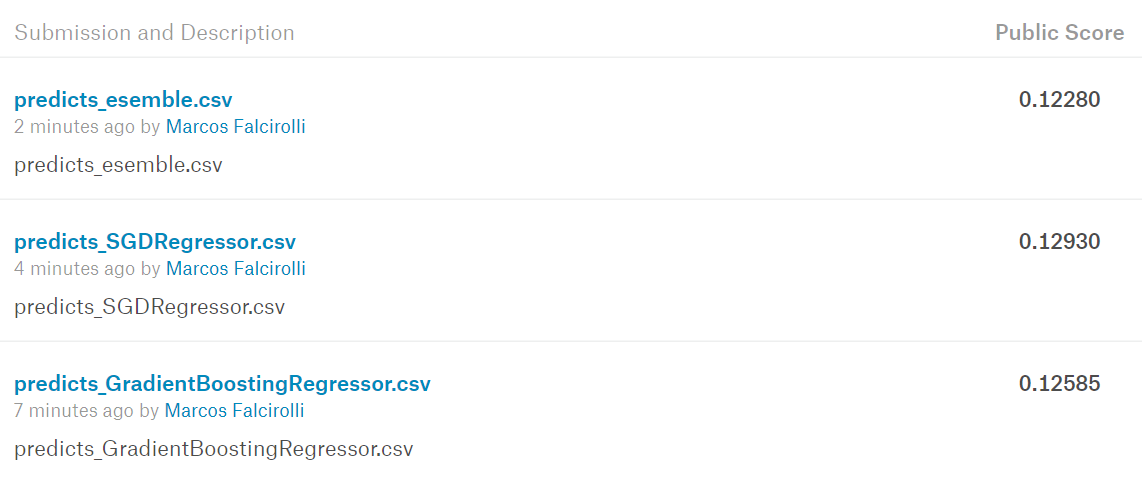

In [97]:
from IPython.display import Image
Image(filename='img/kaggle_score.png', width=850, height=400)

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [101]:
X_train_scaled= sc.transform(X_train)

In [102]:
X_test_scaled= sc.transform(X_test)

In [103]:
regressorGradientBoostingRegressor.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=7, min_weight_fraction_leaf=0.0,
             n_estimators=300, presort='auto', random_state=42,
             subsample=0.7, verbose=0, warm_start=False)

In [104]:
regressorSGDRegressor.fit(X_train_scaled, y_train)

SGDRegressor(alpha=0.3, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [120]:
np.exp(regressorSGDRegressor.predict(X_test_scaled))[:4]

array([204906.01116191, 294390.1657575 , 171337.8166233 , 200203.2362767 ])

In [121]:
np.exp(regressorGradientBoostingRegressor.predict(X_test))[:4]

array([217131.71967834, 308054.47367358, 173856.86254771, 222741.19409122])

In [122]:
np.exp(y_test).values[:4]

array([213250., 290000., 177000., 210000.])

In [116]:
y_test

538     12.270220
754     12.577636
49      12.083905
1447    12.254863
141     12.019743
614     12.659734
1050    12.421184
793     13.091904
1006    11.350407
1324    11.740061
874     11.824080
947     12.055250
602     11.931636
838     11.856515
168     12.337101
381     12.271392
1148    12.292250
1151    12.367885
247     12.100712
988     11.708492
115     11.842229
65      12.100712
643     11.951180
651     11.385092
809     11.661345
270     12.394625
578     11.682668
1046    11.881035
787     12.505399
51      11.608236
          ...    
910     11.225243
1047    12.449019
198     12.524163
1422    11.875831
1406    12.077671
422     12.660328
527     12.072541
984     12.031719
1055    11.407565
1074    11.798104
506     11.989160
1323    11.512925
428     12.072541
915     11.890677
824     11.900905
906     11.874090
1030    12.567237
548     12.450978
43      11.856515
1187    12.078239
1029    12.661914
963     11.813030
845     11.786762
101     11.686576
244     12